## Przemysław Kierzkowski
## "Wprowadzenie do uczenia maszynowego w Pythonie" 2024 r. - projekt zaliczeniowy
### Dane: [link](https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction)
### Cel: klasyfikacja binarna
Uwaga: wykonanie całego skryptu trwa ok. 9 minut,<br>
najdłużej trwają obliczenia Shapley values i k-krotna kroswalidacja,<br>
Intel® Core™ i7-4700MQ CPU @ 2.40GHz × 8, Ubuntu 22.04.3 LTS.<br> 
### Opis problemu
National Geographic [link](https://www.national-geographic.pl/artykul/340-pulsary-fermiego-kosmiczne-obserwatorium-promieniowania-gamma-pomaga-nam-zrozumiec-te-enigmatyczne-obiekty-231205011547).
Pulsary to szybko rotujące gwiazdy neutronowe o silnym dipolowym polu magnetycznym.
Obserwacja pulsarów jest sposobem na prowadzenie szerokiego zakresu badań astrofizycznych, od promieniowania kosmicznego i ewolucji gwiazd po poszukiwanie fal grawitacyjnych i ciemnej materii.<br>
W porównaniu z szacunkową liczbą ciał niebieski obserwowalnych z Ziemi pulsary są obiektami niezwykle rzadkimi. Obecnie znanych jest ok. 3 400 pulsarów.

Model AI przeszukujący bazy obiektów astronomimcznych i wskazujący kandydatów do dalszych, bardziej szczegółowych obserwacji, mógłby znacząco przyśpieszyć odkrywanie kolejnych pulsarów.
Model typujący kandydatów na pulsary powinien (mógłby) posiadać następujące cechy:
* wysoka precyzja, precission = tp/(tp+fp), niska wartość wskazań fałszywie pozytywnych zmniejszyłaby czas obserwacji ciał nie będących pulsarami,
* wysoki recall - znacząca część pulsarów zostałaby wskazana do szczegółowej obserwacji,
* model może być skomplikowany - w związku z niewielkim tempem odkrywania nowych pulsarów, przewidywany czas użytkowania modelu będzie stosunkowo długi.
### Opis zbioru danych
Udostępniony zbiór danych:
* zawiera 17 898 obiektów z czego 1 639 jest oznaczonych jako pulsar. Pulsary / nie pulsary ~ 10%,<br>
* zbiór nie zawiera wartości pustych NaN,<br>
* zbiór zawiera 7 cech obiektów plus kolumna "Class",<br>
* część par cech wykazuje znaczącą korelację liniową,<br>
* większość cech, poza "SD", charakteryzuje się rozkładami odbiegającymi od normalnego,<br>
* istnieją cechy, których wartości w znacznym stopniu wskazują na przynależność obiektu do jedne z dwóch klas.
Obrazują to dwuwymiarowe wykresy przynależności obiektów do klasy w zależności od wartości wybranych dwóch cech.<br>
### Przygotowanie zbiorów: uczącego, walidacyjnego i testowego
* zbiór danych podzielono na trzy części: zbiór uczący 60%, zbiór walidacyjny i zbór testowy po 20% każdy,<br>
* podziału dokonano poprzez losowanie warstwowe, zapewiając udział klasy 1 (pulsar) w proporcji pierwotej w każdym z powstałych podzbiorów,
* zbiory poddano standaryzacji używając parametrów zbioru uczącego.
* zbiór walidacyjny służył do wstępnej oceny skuteczności modeli, został użyty w procedurach dostrajania hiperparametrów i k-krotnej kroswalidacji,<br>
* zbiór testowy został użyty jeden raz do końcowej oceny wytypowanego modelu.<br>
### Budowa i wybór modelu
#### Wybór miar oceniających skuteczność modeli
* ze względu na znaczącą nierównowagę liczebności klas (~ 1/10) jako miarę główną służącą ocenie skuteczności modeli użyto F1,<br>
* ze względów na przeznaczenie modelu wskazane w "Opisie problemu" jako miary pomocnicze zastosowano precission, recall, acc i macierz pomyłek.<br>
#### Model odniesienia
* jako model odniesienia zastosowano klasyfikator Drzewo Decyzyjne (DecisionTreeClassifier) z parametrami domyślnmymi.<br>
#### Modele próbne
Każdą z 5 poniższych metod klasyfikacji:<br> DecisionTreeClassifier, LogisticRegression, LinearSVC, MLPClassifier, XGBClassifier<br> poddano:
* procedurze dostrajania hiperparametrów przy pomocy pakietu optuna,<br>
optymalizacji dokonano na danych zawierających wszystkie cechy oraz na danych o zredukowanej liczbie cech poprzez metodę PCA. Gdy stosowano PCA liczba cech była jednym z parametrów podlegających optymalizacji,<br> 
* uczeniu na zbiorze uczącym a następnie wstępnej ocenie na zbiorze walidacyjnym,<br>
* z wybranych modeli utworzono zespoły głosujące metodą hard i soft, tak powstałe modele poddano ocenie,<br>
* z wybranych modeli utworzono stosy w różnych konfiguracjach klasyfikatora końcowego, powstałe modele poddano ocenie\,<br>

W wyniku tych operacji powstało 9 modeli, ich wyniki zaprezentowano w Tabeli 1. Wszystkie osiągają, na zbiorze walidacyjnym, wyższe od modelu odniesienia wartości F1, acc i precision. Tylko trzy modele osiągnęły wartości precyzji powyżej 0.940 przy recall powyżej 0.840.<br>
W celu wytypowania najstabilniejszego modelu wszystkie poddano 10-krotnej kroswalidacji na połączonych zbiorach uczącym i walidacyjnym.<br>
#### Wybór modelu
Analiza wyników uzyskanych z kroswalidacji, prezentowanych w Tabelach 2 i 3 nie wskazuje zdecydowanego zwycięzcy.<br>
Liniowa Maszyna Wektorów Nośnych - LinearSVC, osiąga najwyższą średnią wartość precyzji równą 0.941 tuż za nią z identycznym wynikiem 0.939 znajdują się Regresja Logistyczna i dwa klasyfikatory zespołowe: zespół głosujący metodą "na twardo" i stos trzech klasyfikatorów z Regresją Logistyczją jako klasyfikatorem końcowym.<br>Na korzyść stacking_3_Reg_Log przemawiają dwa ważne argumenty:
* najniższe odchylenie standardowe i względne odchylenie standardowe precyzji,<br>
* najwyższe i najstabilniejsze wartości F1 i recall spośród czterech omawianych modeli.<br>

Priorytetem, przy wyborze modelu, jest wysoka i stabilna wartość precyzji. Parametry te zapewniają minimalizację czasu poświęcanego na obserwację wskazanych przez model objektów nie będących w rzeczywistości pulsarami. Z tego powodu stacking_3_Reg_Log został wybrany jako model najlepszy.<br>
### Cechy zwycięskiego modelu
#### Test końcowy 
Wyniki testu zwycięskiego modelu -stacking_3_Reg_Log- prezentowane są w Tabeli 4.<br>
Test końcowy potwierdza wysoką wartość precyzji modelu, na nigdy nie widzianych obiektach, wartość tej miary wyniosła 0.946, a ilość fałszywych alarmów niecałe 0.5%.
#### Istotność cech, według Shapley values
Wykresy przedstawiające wpływ poszczególnych cech na wynik klasyfikacji dokonywanej przez stacking_3_Reg_Log wskazują na dominację cechy "EK". Jej wpływ na wynik modelu jest o rząd wielkości większy od wszystkich pozostałych cech. Wykres beeswarm jednoznacznie wskazuje, że wysokie wartości "EK" są charakterystyczne dla pulsarów. Jest to zgodne z wnioskami wynikającymi z wykresów sporządzonych na etapie analizy danych. Pomimo tak silnego i jednoznacznego wpływu wartości cechy "EK" na wynik klasyfikacji, zmniejszenie liczby cech poprzez PCA w każdym przypadku pogorszało wyniki modeli próbnych. Jedynym wyjątkiem była gęsta sieć neuronowa (MLPClassifier_pca_v2) w której zastosowanie PCA minimalnie poprawiło F1.

In [1]:
import pandas as pd
df_pods = pd.read_csv('pods.csv')
df_pods.sort_values(by='precision', axis=0, ascending=False, inplace=True)
print('Tabel 1 - wyniki modeli na zbiorze walidacyjnym')
df_pods.head(20)

Tabel 1 - wyniki modeli na zbiorze walidacyjnym


Unnamed: 0     F1  recall  precision    acc    tn  fn  fp   tp
0             LinearSVC  0.895   0.848      0.949  0.982  3237  50  15  278
1           voting_hard  0.896   0.851      0.946  0.982  3236  49  16  279
2  Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277
3  MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
4      MLPClassifier_v2  0.897   0.863      0.934  0.982  3232  45  20  283
5      XGBClassifier_v2  0.899   0.866      0.934  0.982  3232  44  20  284
6          stacking_1_1  0.899   0.866      0.934  0.982  3232  44  20  284
7    stacking_3_Reg_Log  0.890   0.851      0.933  0.981  3232  49  20  279
8           voting_soft  0.894   0.860      0.931  0.981  3231  46  21  282
9             Benchmark  0.847   0.872      0.824  0.971  3191  42  61  286

In [2]:
df_kfold = pd.read_csv('kfold_wyn.csv')
df_kfold.sort_values(by='prec', axis=0, ascending=False, inplace=True)
print('Tabel 2 - wynik 10 krotnej kroswalidacji, posortowany malejąco po wartościach precyzji.')
df_kfold.head(20)

Tabel 2 - wynik 10 krotnej kroswalidacji, posortowany malejąco po wartościach precyzji.


Unnamed: 0     F1  F1 std  std% F1  recall  recall std  \
0             LinearSVC  0.875   0.026    2.918   0.818       0.039   
1  Regresja_Logistyczna  0.871   0.028    3.177   0.814       0.042   
2           voting_hard  0.875   0.027    3.087   0.820       0.040   
3    stacking_3_Reg_Log  0.879   0.023    2.618   0.827       0.039   
4           voting_soft  0.884   0.025    2.779   0.840       0.034   
5  MLPClassifier_pca_v2  0.881   0.026    2.933   0.836       0.037   
6      XGBClassifier_v2  0.880   0.026    2.912   0.836       0.038   
7      MLPClassifier_v2  0.882   0.027    3.030   0.841       0.036   
8          stacking_1_1  0.880   0.025    2.840   0.838       0.038   
9             Benchmark  0.820   0.025    3.037   0.823       0.030   

   std% recall   prec  prec std  std% prec    acc  acc std  std% acc  
0        4.827  0.941     0.019      2.038  0.979    0.004     0.402  
1        5.114  0.939     0.018      1.868  0.978    0.004     0.446  
2        4.869  0.939     0.018      1.945  0.979    0.004     0.428  
3        4.699  0.939     0.011      1.217  0.979    0.004     0.366  
4        4.106  0.933     0.019      2.002  0.980    0.004     0.414  
5        4.431  0.931     0.019      2.071  0.979    0.004     0.436  
6        4.575  0.930     0.019      1.997  0.979    0.004     0.416  
7        4.296  0.928     0.023      2.433  0.980    0.004     0.442  
8        4.550  0.928     0.019      2.051  0.979    0.004     0.405  
9        3.590  0.817     0.032      3.954  0.967    0.005     0.508

In [3]:
df_kfold.sort_values(by='prec std', axis=0, ascending=True, inplace=True)
print('Tabel 3 - wynik 10 krotnej kroswalidacji, posortowany rosnąco po odchyleniu standardowym precyzji.')
df_kfold.head(20)

Tabel 3 - wynik 10 krotnej kroswalidacji, posortowany rosnąco po odchyleniu standardowym precyzji.


Unnamed: 0     F1  F1 std  std% F1  recall  recall std  \
3    stacking_3_Reg_Log  0.879   0.023    2.618   0.827       0.039   
1  Regresja_Logistyczna  0.871   0.028    3.177   0.814       0.042   
2           voting_hard  0.875   0.027    3.087   0.820       0.040   
0             LinearSVC  0.875   0.026    2.918   0.818       0.039   
4           voting_soft  0.884   0.025    2.779   0.840       0.034   
5  MLPClassifier_pca_v2  0.881   0.026    2.933   0.836       0.037   
6      XGBClassifier_v2  0.880   0.026    2.912   0.836       0.038   
8          stacking_1_1  0.880   0.025    2.840   0.838       0.038   
7      MLPClassifier_v2  0.882   0.027    3.030   0.841       0.036   
9             Benchmark  0.820   0.025    3.037   0.823       0.030   

   std% recall   prec  prec std  std% prec    acc  acc std  std% acc  
3        4.699  0.939     0.011      1.217  0.979    0.004     0.366  
1        5.114  0.939     0.018      1.868  0.978    0.004     0.446  
2        4.869  0.939     0.018      1.945  0.979    0.004     0.428  
0        4.827  0.941     0.019      2.038  0.979    0.004     0.402  
4        4.106  0.933     0.019      2.002  0.980    0.004     0.414  
5        4.431  0.931     0.019      2.071  0.979    0.004     0.436  
6        4.575  0.930     0.019      1.997  0.979    0.004     0.416  
8        4.550  0.928     0.019      2.051  0.979    0.004     0.405  
7        4.296  0.928     0.023      2.433  0.980    0.004     0.442  
9        3.590  0.817     0.032      3.954  0.967    0.005     0.508

In [4]:
df_test = pd.read_csv('test.csv')
print('Tabel 4 - wyniki testu końcowego wybranego modelu.')
df_test.head(20)

Tabel 4 - wyniki testu końcowego wybranego modelu.


Unnamed: 0     F1  recall  precision    acc    tn  fn  fp   tp
0  stacking_3_Reg_Log  0.896   0.851      0.946  0.982  3236  49  16  279

In [5]:
#-----------------------------------------------------------------------------------------------------

In [6]:
random_state = 123
zaok = 3 # zaokrąglanie miar
#----------------------------------------------------------------------------
import sys
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt

import optuna
import logging
import pickle
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

from sklearn import model_selection
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df=pd.read_csv('Pulsar_oryginal.csv')
print(df.shape)
df.head()

(17898, 9)


Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0       140.562500  55.683782 -0.234571 -0.699648          3.199833   
1       102.507812  58.882430  0.465318 -0.515088          1.677258   
2       103.015625  39.341649  0.323328  1.051164          3.121237   
3       136.750000  57.178449 -0.068415 -0.636238          3.642977   
4        88.726562  40.672225  0.600866  1.123492          1.178930   

   SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  
0       19.110426        7.975532             74.242225      0  
1       14.860146       10.576487            127.393580      0  
2       21.744669        7.735822             63.171909      0  
3       20.959280        6.896499             53.593661      0  
4       11.468720       14.269573            252.567306      0

In [9]:
df.isna().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [11]:
df.describe()

Mean_Integrated            SD            EK      Skewness  \
count     17898.000000  17898.000000  17898.000000  17898.000000   
mean        111.079968     46.549532      0.477857      1.770279   
std          25.652935      6.843189      1.064040      6.167913   
min           5.812500     24.772042     -1.876011     -1.791886   
25%         100.929688     42.376018      0.027098     -0.188572   
50%         115.078125     46.947479      0.223240      0.198710   
75%         127.085938     51.023202      0.473325      0.927783   
max         192.617188     98.778911      8.069522     68.101622   

       Mean_DMSNR_Curve  SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  \
count      17898.000000    17898.000000    17898.000000          17898.000000   
mean          12.614400       26.326515        8.303556            104.857709   
std           29.472897       19.470572        4.506092            106.514540   
min            0.213211        7.370432       -3.139270             -1.976976   
25%            1.923077       14.437332        5.781506             34.960504   
50%            2.801839       18.461316        8.433515             83.064556   
75%            5.464256       28.428104       10.702959            139.309330   
max          223.392141      110.642211       34.539844           1191.000837   

              Class  
count  17898.000000  
mean       0.091574  
std        0.288432  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

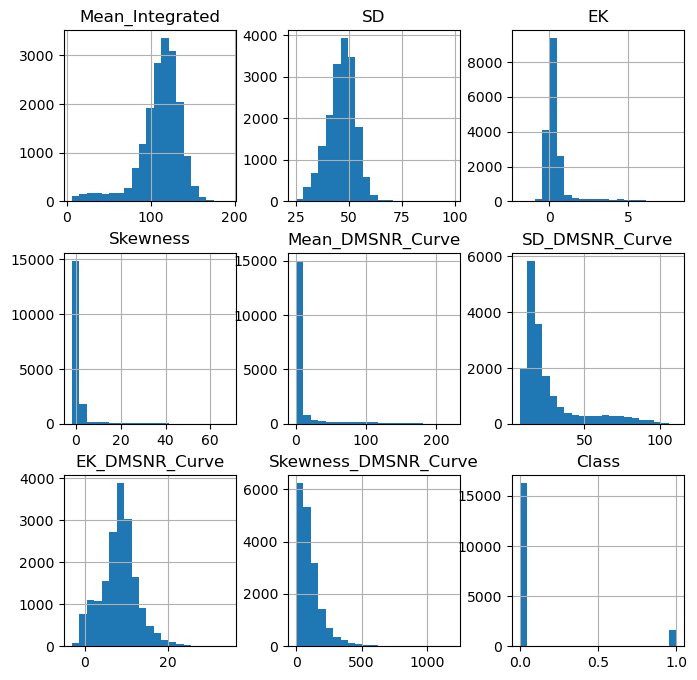

In [12]:
df.hist(bins=21, figsize=(8,8))
plt.show()

In [13]:
corr = df.corr()
round(corr,2)

Mean_Integrated    SD    EK  Skewness  Mean_DMSNR_Curve  \
Mean_Integrated                  1.00  0.55 -0.87     -0.74             -0.30   
SD                               0.55  1.00 -0.52     -0.54              0.01   
EK                              -0.87 -0.52  1.00      0.95              0.41   
Skewness                        -0.74 -0.54  0.95      1.00              0.41   
Mean_DMSNR_Curve                -0.30  0.01  0.41      0.41              1.00   
SD_DMSNR_Curve                  -0.31 -0.05  0.43      0.42              0.80   
EK_DMSNR_Curve                   0.23  0.03 -0.34     -0.33             -0.62   
Skewness_DMSNR_Curve             0.14  0.03 -0.21     -0.20             -0.35   
Class                           -0.67 -0.36  0.79      0.71              0.40   

                      SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  \
Mean_Integrated                -0.31            0.23                  0.14   
SD                             -0.05            0.03                  0.03   
EK                              0.43           -0.34                 -0.21   
Skewness                        0.42           -0.33                 -0.20   
Mean_DMSNR_Curve                0.80           -0.62                 -0.35   
SD_DMSNR_Curve                  1.00           -0.81                 -0.58   
EK_DMSNR_Curve                 -0.81            1.00                  0.92   
Skewness_DMSNR_Curve           -0.58            0.92                  1.00   
Class                           0.49           -0.39                 -0.26   

                      Class  
Mean_Integrated       -0.67  
SD                    -0.36  
EK                     0.79  
Skewness               0.71  
Mean_DMSNR_Curve       0.40  
SD_DMSNR_Curve         0.49  
EK_DMSNR_Curve        -0.39  
Skewness_DMSNR_Curve  -0.26  
Class                  1.00

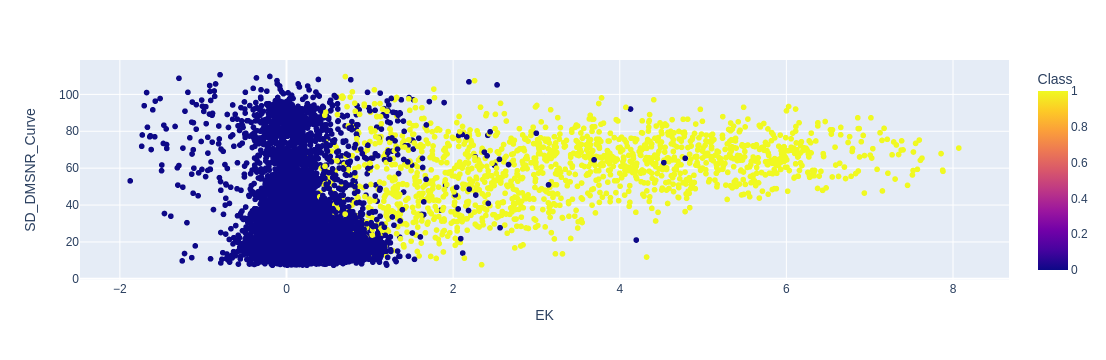

In [14]:
plot = px.scatter(df, x=df['EK'], y=df['SD_DMSNR_Curve'], color='Class')
plot.update_traces(textposition="bottom right")
plot.show()

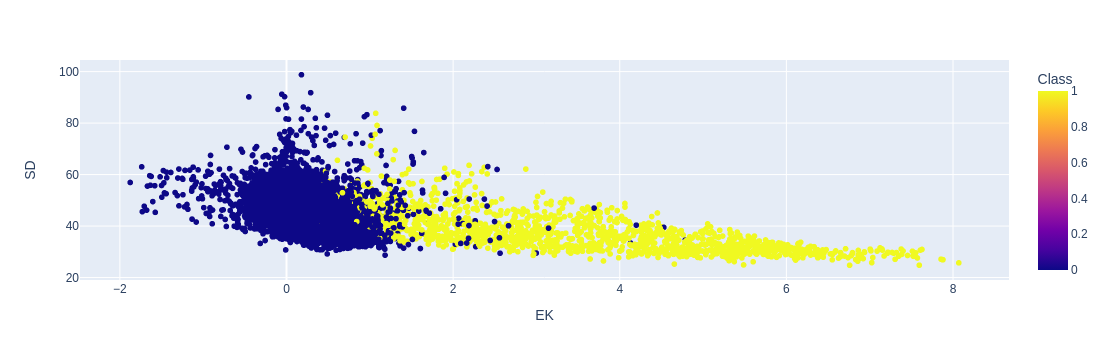

In [15]:
plot = px.scatter(df, x=df['EK'], y=df['SD'], color='Class')
plot.update_traces(textposition="bottom right")
plot.show()

In [16]:
# Utworzenie zbiorów: treningowy - 60%, walidacyjny -20%, testowy - 20%, losowanie warstwowe
#--------------------------------------------------------------------------------------------
dataX = df.copy().drop(['Class'],axis=1)
dataY = df['Class'].copy()
x_train, x_val_test, y_train, y_val_test = train_test_split(dataX, dataY, test_size=0.40,random_state=123, stratify=dataY)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.50,random_state=123, stratify=y_val_test)
print(dataX.shape, x_train.shape, x_val.shape, x_test.shape)
#--------------------------------------------------------------------------------------------
# Standaryzacja danych, parametrami zbioru uczącego
std = StandardScaler(copy=True)
x_train_std = std.fit_transform(x_train)
x_val_std = std.transform(x_val)
x_test_std = std.transform(x_test)

X_train_std = pd.DataFrame(x_train_std,columns=dataX.columns, index=x_train.index)
Y_train = pd.DataFrame(y_train, index=x_train.index)

X_val_std = pd.DataFrame(x_val_std,columns=dataX.columns, index=x_val.index)
Y_val = pd.DataFrame(y_val, index=x_val.index)

X_test_std = pd.DataFrame(x_test_std,columns=dataX.columns, index=x_test.index)
Y_test = pd.DataFrame(y_test, index=x_test.index)

#--------------------------------------------------------------------------------------------
# redukcja wymiarowości moetodą PCA z zachowaniem 95% wariancji
n_components = 0.95
pca = PCA(n_components)
x_train_std_pca =pca.fit_transform(x_train_std)
x_val_std_pca = pca.transform(x_val_std)
x_test_std_pca = pca.transform(x_test_std)


(17898, 8) (10738, 8) (3580, 8) (3580, 8)


In [17]:
dataY.value_counts()

0    16259
1     1639
Name: Class, dtype: int64

In [18]:
#--------------------------------------------------------------------------------------------
# dictionary colected all models
models_dict = {}
#--------------------------------------------------------------------------------------------

In [19]:
#---------------------------------------------------------------------------------------------
def miary_pods (y_true, y_pred, model_name, df = pd.DataFrame({'A' : []}), zaok = zaok):
    '''
    Oblicza miary i macierz pomyłek, dodaje wartości do dostarczonego DataFrame
    Zwraca DataFrame
    '''
    f1=round(f1_score(y_true, y_pred),zaok)
    conf_mat =  confusion_matrix(y_true, y_pred)
    f1=round(f1_score(y_true, y_pred),zaok)
    conf_mat =  confusion_matrix(y_true, y_pred)
    tn = int(conf_mat[0,0])
    fp = int(conf_mat[0,1])
    fn = int(conf_mat[1,0])
    tp = int(conf_mat[1,1])
    precision = round(precision_score(y_true, y_pred),zaok)
    recall = round(recall_score(y_true, y_pred),zaok)
    acc = round(accuracy_score(y_true, y_pred),zaok)
    #-----------------------------------------------------------------
    df_1 = pd.DataFrame({'F1': [f1],
                         'recall': [recall],
                         'precision': [precision],
                         'acc': [acc],
                         'tn': [tn],
                         'fn': [fn],
                         'fp': [fp],
                         'tp': [tp]},
                         index = [model_name])
    #-----------------------------------------------------------------
    if df.empty:
        df = df_1
    else:
        df = pd.concat([df, df_1])
    #-----------------------------------------------------------------
    return df
#---------------------------------------------------------------------------------------------    

In [20]:
#---------------------------------------------------------------------------------------------
def optuna_bazy (model_name, metric = ['F1'], directions = ['maximize']):
    '''
    Tworzy bazy danych przechowujące wyniki optymalizacji optuny
    Odczytuje wyniki z baz danych
    Ustawia miary stosowane w procedurze objective
    '''
    #---------------------------------------------------------------------------------------------
    # Add stream handler of stdout to show the messages
    optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
    study_name = "optuna_" + model_name  # Unique identifier of the study.
    storage_name = "sqlite:///{}.db".format(study_name)
    study = optuna.create_study(directions = directions,
                                study_name = study_name,
                                storage = storage_name,
                                load_if_exists=True)
    study.set_metric_names(metric)
    #---------------------------------------------------------------------------------------------
    # Save the sampler with pickle to be loaded later.
    with open("sampler_" + model_name + ".pkl", "wb") as fout:
        pickle.dump(study.sampler, fout)

    restored_sampler = pickle.load(open("sampler_" + model_name + ".pkl", "rb"))
    study = optuna.create_study(directions = directions,
                                study_name = study_name,
                                storage = storage_name,
                                load_if_exists = True,
                                sampler = restored_sampler)
    return study
    #---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------    

In [21]:
#--------------------------------------------------------------------------------------------
# Model odniesienia - Drzewo Decyzyjne z ustawieniami domyślnymi
#--------------------------------------------------------------------------------------------
model_name = 'Benchmark'
clf_benchmark = DecisionTreeClassifier(random_state=random_state)
clf_benchmark.fit(x_train_std, y_train)
y_pred = clf_benchmark.predict(x_val_std)

models_dict[model_name] = clf_benchmark
pods = miary_pods (y_val, y_pred, model_name)
pods.head(20)
#--------------------------------------------------------------------------------------------

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark  0.847   0.872      0.824  0.971  3191  42  61  286

In [22]:
#---------------------------------------------------------------------------------------------
# Dostrajanie hiperparametrów MLPClassifier na danych standaryzowanych.
#---------------------------------------------------------------------------------------------
n_trials = 1
model_name = 'MLPClassifier_v2'
#---------------------------------------------------------------------------------------------

def objective(trial):
    #------------------------------------------------------------------------------
    h_l_s = trial.suggest_int(name='hidden_layer_sizes', low=1, high=100)
    activation = trial.suggest_categorical(name='activation',choices= ['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical(name='solver',choices= ['lbfgs', 'sgd', 'adam']) 
    learning_rate = trial.suggest_categorical(name='learning_rate',choices= ['constant', 'invscaling', 'adaptive'])
    learning_rate_init = trial.suggest_float(name ='learning_rate_init', low=1e-7, high=1)                                                                             
    #------------------------------------------------------------------------------
    model = MLPClassifier(hidden_layer_sizes=(h_l_s,),
                          activation=activation,
                          solver= solver,
                          alpha=0.0001,
                          batch_size='auto',
                          learning_rate=learning_rate,
                          learning_rate_init=learning_rate_init,
                          power_t=0.5,
                          max_iter=2000,
                          shuffle=True,
                          random_state=random_state,
                          tol=0.0001,
                          verbose=False,
                          warm_start=False,
                          momentum=0.9,
                          nesterovs_momentum=True,
                          early_stopping=False,
                          validation_fraction=0.1,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-08,
                          n_iter_no_change=50,
                          max_fun=15000)
    #------------------------------------------------------------------------------
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std)
    f1=f1_score(y_val, y_pred)
    return f1 
#---------------------------------------------------------------------------------------------
study = optuna_bazy (model_name) #, metric = ['F1'], directions = ['maximize'])
study.optimize(objective, n_trials)
trial = study.best_trial

[I 2024-05-15 00:34:38,588] Using an existing study with name 'optuna_MLPClassifier_v2' instead of creating a new one.


Using an existing study with name 'optuna_MLPClassifier_v2' instead of creating a new one.


/tmp/ipykernel_43126/1009314361.py:17: ExperimentalWarning:

set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.

[I 2024-05-15 00:34:38,640] Using an existing study with name 'optuna_MLPClassifier_v2' instead of creating a new one.


Using an existing study with name 'optuna_MLPClassifier_v2' instead of creating a new one.


[I 2024-05-15 00:34:39,502] Trial 618 finished with value: {'F1': 0.8808777429467085} and parameters: {'hidden_layer_sizes': 3, 'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'adaptive', 'learning_rate_init': 0.6253480856677867}. Best is trial 149 with value: 0.8969889064976228.


Trial 618 finished with value: {'F1': 0.8808777429467085} and parameters: {'hidden_layer_sizes': 3, 'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'adaptive', 'learning_rate_init': 0.6253480856677867}. Best is trial 149 with value: 0.8969889064976228.


In [23]:
print('--------------------------------------------------------------------------------------------------')
print(f"F1 best trial: {trial.value:.3f}")
print("Best hyperparameters: {}".format(trial.params))
print('---------------------------------------------------------------------------------------------------------------------------------')


#optuna.visualization.plot_param_importances(study)

--------------------------------------------------------------------------------------------------
F1 best trial: 0.897
Best hyperparameters: {'hidden_layer_sizes': 1, 'activation': 'logistic', 'solver': 'lbfgs', 'learning_rate': 'adaptive', 'learning_rate_init': 0.7432270726112045}
---------------------------------------------------------------------------------------------------------------------------------


In [24]:
h_l_s = trial.params['hidden_layer_sizes']
activation = trial.params['activation']
solver = trial.params['solver']
learning_rate = trial.params['learning_rate']
learning_rate_init = trial.params['learning_rate_init']
#------------------------------------------------------------------------------
mlpc = MLPClassifier(hidden_layer_sizes=(h_l_s,),
                          activation=activation,
                          solver= solver,
                          alpha=0.0001,
                          batch_size='auto',
                          learning_rate=learning_rate,
                          learning_rate_init=learning_rate_init,
                          power_t=0.5,
                          max_iter=2000,
                          shuffle=True,
                          random_state=random_state,
                          tol=0.0001,
                          verbose=False,
                          warm_start=False,
                          momentum=0.9,
                          nesterovs_momentum=True,
                          early_stopping=False,
                          validation_fraction=0.1,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-08,
                          n_iter_no_change=10,
                          max_fun=15000)
    
#------------------------------------------------------------------------------
mlpc.fit(x_train_std, y_train)
y_pred = mlpc.predict(x_val_std)
#------------------------------------------------------------------------------
models_dict[model_name] = mlpc
#------------------------------------------------------------------------------
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)
#------------------------------------------------------------------------------

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark         0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2  0.897   0.863      0.934  0.982  3232  45  20  283

In [25]:
#---------------------------------------------------------------------------------------------
# Dostrajanie hiperparametrów MLPClassifier na danych standaryzowanych i pca
#---------------------------------------------------------------------------------------------
n_trials = 1
model_name = 'MLPClassifier_pca_v2'
#---------------------------------------------------------------------------------------------

def objective(trial):
    n_components = trial.suggest_int(name ='n_components', low=1, high=7)
    h_l_s = trial.suggest_int(name='hidden_layer_sizes', low=1, high=10)
    activation = trial.suggest_categorical(name='activation',choices= ['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical(name='solver',choices= ['lbfgs', 'sgd', 'adam']) 
    learning_rate = trial.suggest_categorical(name='learning_rate',choices= ['constant', 'invscaling', 'adaptive'])
    learning_rate_init = trial.suggest_float(name ='learning_rate_init', low=1e-7, high=1)                                                                             
    #------------------------------------------------------------------------------
    
    model = MLPClassifier(hidden_layer_sizes=(h_l_s,),
                          activation=activation,
                          solver= solver,
                          alpha=0.0001,
                          batch_size='auto',
                          learning_rate=learning_rate,
                          learning_rate_init=learning_rate_init,
                          power_t=0.5,
                          max_iter=2000,
                          shuffle=True,
                          random_state=random_state,
                          tol=0.0001,
                          verbose=False,
                          warm_start=False,
                          momentum=0.9,
                          nesterovs_momentum=True,
                          early_stopping=False,
                          validation_fraction=0.1,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-08,
                          n_iter_no_change=10,
                          max_fun=15000)
    
    pca = PCA(n_components)
    x_train_std_pca =pca.fit_transform(x_train_std)
    x_val_std_pca = pca.transform(x_val_std)
    model.fit(x_train_std_pca, y_train)
    y_pred = model.predict(x_val_std_pca)
    f1=f1_score(y_val, y_pred)
    return f1 
#---------------------------------------------------------------------------------------------
study = optuna_bazy (model_name)

study.optimize(objective, n_trials)
trial = study.best_trial

[I 2024-05-15 00:34:44,609] Using an existing study with name 'optuna_MLPClassifier_pca_v2' instead of creating a new one.


Using an existing study with name 'optuna_MLPClassifier_pca_v2' instead of creating a new one.
Using an existing study with name 'optuna_MLPClassifier_pca_v2' instead of creating a new one.


/tmp/ipykernel_43126/1009314361.py:17: ExperimentalWarning:

set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.

[I 2024-05-15 00:34:44,669] Using an existing study with name 'optuna_MLPClassifier_pca_v2' instead of creating a new one.


Using an existing study with name 'optuna_MLPClassifier_pca_v2' instead of creating a new one.
Using an existing study with name 'optuna_MLPClassifier_pca_v2' instead of creating a new one.


[I 2024-05-15 00:34:47,141] Trial 916 finished with value: {'F1': 0.8984126984126983} and parameters: {'n_components': 7, 'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'learning_rate_init': 0.9252650135512922}. Best is trial 10 with value: 0.8984126984126983.


Trial 916 finished with value: {'F1': 0.8984126984126983} and parameters: {'n_components': 7, 'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'learning_rate_init': 0.9252650135512922}. Best is trial 10 with value: 0.8984126984126983.
Trial 916 finished with value: {'F1': 0.8984126984126983} and parameters: {'n_components': 7, 'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'learning_rate_init': 0.9252650135512922}. Best is trial 10 with value: 0.8984126984126983.


--------------------------------------------------------------------------------------------------
F1 best trial: 0.898
Best hyperparameters: {'n_components': 7, 'hidden_layer_sizes': 1, 'activation': 'relu', 'solver': 'sgd', 'learning_rate': 'adaptive', 'learning_rate_init': 0.9377884292945784}
---------------------------------------------------------------------------------------------------------------------------------


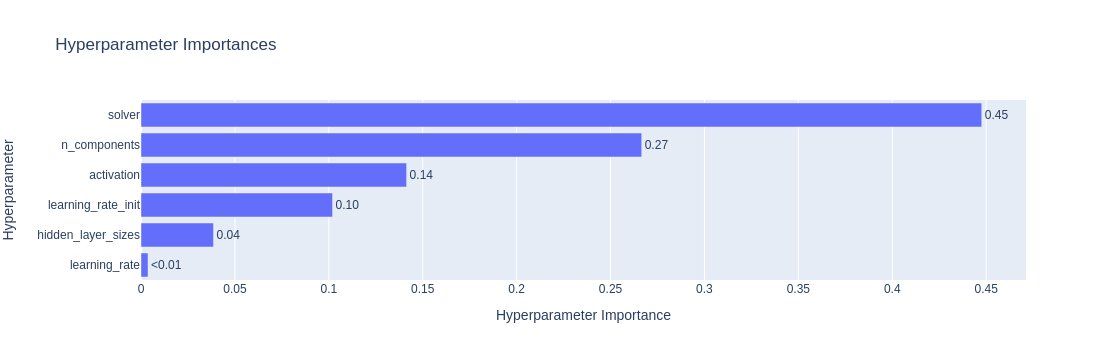

In [26]:
print('--------------------------------------------------------------------------------------------------')
print(f"F1 best trial: {trial.value:.3f}")
print("Best hyperparameters: {}".format(trial.params))
print('---------------------------------------------------------------------------------------------------------------------------------')


optuna.visualization.plot_param_importances(study)

In [27]:
n_components = trial.params['n_components']
h_l_s = trial.params['hidden_layer_sizes']
activation = trial.params['activation']
solver = trial.params['solver']
learning_rate = trial.params['learning_rate']
learning_rate_init = trial.params['learning_rate_init']
#------------------------------------------------------------------------------
    
mlpc_pca = MLPClassifier(hidden_layer_sizes=(h_l_s,),
                          activation=activation,
                          solver= solver,
                          alpha=0.0001,
                          batch_size='auto',
                          learning_rate=learning_rate,
                          learning_rate_init=learning_rate_init,
                          power_t=0.5,
                          max_iter=2000,
                          shuffle=True,
                          random_state=random_state,
                          tol=0.0001,
                          verbose=False,
                          warm_start=False,
                          momentum=0.9,
                          nesterovs_momentum=True,
                          early_stopping=False,
                          validation_fraction=0.1,
                          beta_1=0.9,
                          beta_2=0.999,
                          epsilon=1e-08,
                          n_iter_no_change=10,
                          max_fun=15000)
    
pca = PCA(n_components)
x_train_std_pca =pca.fit_transform(x_train_std)
x_val_std_pca = pca.transform(x_val_std)
mlpc_pca.fit(x_train_std_pca, y_train)
y_pred = mlpc_pca.predict(x_val_std_pca)

models_dict[model_name] = mlpc_pca
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283

In [28]:
#---------------------------------------------------------------------------------------------
# Dostrajanie hiperparametrów XGBClassifier na danych standaryzowanych.
#---------------------------------------------------------------------------------------------
n_trials = 1
model_name = 'XGBClassifier_v2'
#---------------------------------------------------------------------------------------------

def objective(trial):

#    n_components = trial.suggest_int(name ='n_components', low=1, high=7)
    n_estimators = trial.suggest_int(name='n_estimators', low=1, high=100)
    learning_rate = trial.suggest_float(name ='learning_rate', low=0.5, high=1)
#    max_depth = trial.suggest_int(name='max_depth', low=1, high=100)
    booster =trial.suggest_categorical(name='booster',choices= ['gbtree', 'gblinear', 'dart'])
    scale_pos_weight = trial.suggest_float(name ='scale_pos_weight', low=0, high=1)
    
    model = xgb.XGBClassifier(  objective='binary:logistic',
                                n_estimators = n_estimators,
 #                               max_depth = max_depth,
                                learning_rate = learning_rate,  
                                booster = booster,
                                scale_pos_weight = scale_pos_weight,
                                random_state=random_state) 

    
#    pca = PCA(n_components)
#    x_train_std_pca =pca.fit_transform(x_train_std)
#    x_val_std_pca = pca.transform(x_val_std)
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std)
    f1=f1_score(y_val, y_pred)
    return f1 
#---------------------------------------------------------------------------------------------
study = optuna_bazy (model_name)
study.optimize(objective, n_trials)
trial_xgb = study.best_trial

[I 2024-05-15 00:34:55,018] Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.


Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.
Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.
Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.


/tmp/ipykernel_43126/1009314361.py:17: ExperimentalWarning:

set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.

[I 2024-05-15 00:34:55,065] Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.


Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.
Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.
Using an existing study with name 'optuna_XGBClassifier_v2' instead of creating a new one.


[I 2024-05-15 00:34:55,621] Trial 504 finished with value: {'F1': 0.8892405063291139} and parameters: {'n_estimators': 9, 'learning_rate': 0.5002532140373213, 'booster': 'dart', 'scale_pos_weight': 0.8045945527660378}. Best is trial 246 with value: 0.8987341772151899.


Trial 504 finished with value: {'F1': 0.8892405063291139} and parameters: {'n_estimators': 9, 'learning_rate': 0.5002532140373213, 'booster': 'dart', 'scale_pos_weight': 0.8045945527660378}. Best is trial 246 with value: 0.8987341772151899.
Trial 504 finished with value: {'F1': 0.8892405063291139} and parameters: {'n_estimators': 9, 'learning_rate': 0.5002532140373213, 'booster': 'dart', 'scale_pos_weight': 0.8045945527660378}. Best is trial 246 with value: 0.8987341772151899.
Trial 504 finished with value: {'F1': 0.8892405063291139} and parameters: {'n_estimators': 9, 'learning_rate': 0.5002532140373213, 'booster': 'dart', 'scale_pos_weight': 0.8045945527660378}. Best is trial 246 with value: 0.8987341772151899.


In [29]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print(f"F1 best trial: {trial_xgb.value:.3f}")
print("Best hyperparameters: {}".format(trial_xgb.params))
print('---------------------------------------------------------------------------------------------------------------------------------')


#optuna.visualization.plot_param_importances(study)

---------------------------------------------------------------------------------------------------------------------------------
F1 best trial: 0.899
Best hyperparameters: {'n_estimators': 13, 'learning_rate': 0.5112135537353457, 'booster': 'dart', 'scale_pos_weight': 0.8189701974196145}
---------------------------------------------------------------------------------------------------------------------------------


In [30]:
#optuna.visualization.plot_optimization_history(study)

In [31]:
#optuna.visualization.plot_slice(study)

In [32]:
#optuna.visualization.plot_parallel_coordinate(study)

In [33]:
n_estimators = trial_xgb.params['n_estimators']
learning_rate = trial_xgb.params['learning_rate']
booster =trial_xgb.params['booster']
scale_pos_weight = trial_xgb.params['scale_pos_weight']
    
xgbc = xgb.XGBClassifier(objective='binary:logistic',
                          n_estimators = n_estimators,
                          learning_rate = learning_rate,  
                          booster = booster,
                          scale_pos_weight = scale_pos_weight,
                          random_state=random_state) 
    
xgbc.fit(x_train_std, y_train)
y_pred = xgbc.predict(x_val_std)

models_dict[model_name] = xgbc
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284

In [34]:
#---------------------------------------------------------------------------------------------
# Dostrajanie hiperparametrów LinearSVC
#---------------------------------------------------------------------------------------------
n_trials = 1
model_name ='LinearSVC' 
#---------------------------------------------------------------------------------------------

def objective(trial):
    penalty = 'l2'#trial.suggest_categorical(name='penalty',choices= ['l2'])
    max_iter = trial.suggest_int(name='max_iter', low=3000, high=10000)
    loss = trial.suggest_categorical(name='loss',choices= ['hinge', 'squared_hinge'])
    multi_class = trial.suggest_categorical(name='multi_class',choices= ['ovr', 'crammer_singer'])
    fit_intercept = trial.suggest_categorical(name='fit_intercept',choices= [True, False])
    class_weightdict = trial.suggest_categorical(name='class_weightdict',choices= ['balanced', None])
    #---------------------------------------------------------------------------------   
    model = LinearSVC(
        penalty = penalty,
        loss = loss,
        multi_class = multi_class,
        random_state=random_state,
        fit_intercept = fit_intercept,
        dual=True,
        max_iter=max_iter)

    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std)
    f1=f1_score(y_val, y_pred)
    return f1 
#---------------------------------------------------------------------------------------------
study = optuna_bazy (model_name)
study.optimize(objective, n_trials)
trial = study.best_trial

[I 2024-05-15 00:35:08,487] Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.


Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.
Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.
Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.
Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.


/tmp/ipykernel_43126/1009314361.py:17: ExperimentalWarning:

set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.

[I 2024-05-15 00:35:08,548] Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.


Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.
Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.
Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.
Using an existing study with name 'optuna_LinearSVC' instead of creating a new one.


/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

[I 2024-05-15 00:35:09,691] Trial 2030 finished with value: {'F1': 0.8971061093247588} and parameters: {'max_iter': 5201, 'loss': 'hinge', 'multi_class': 'ovr', 'fit_intercept': True, 'class_weightdict': None}. Best is trial 56 with value: 0.8971061093247588.


Trial 2030 finished with value: {'F1': 0.8971061093247588} and parameters: {'max_iter': 5201, 'loss': 'hinge', 'multi_class': 'ovr', 'fit_intercept': True, 'class_weightdict': None}. Best is trial 56 with value: 0.8971061093247588.
Trial 2030 finished with value: {'F1': 0.8971061093247588} and parameters: {'max_iter': 5201, 'loss': 'hinge', 'multi_class': 'ovr', 'fit_intercept': True, 'class_weightdict': None}. Best is trial 56 with value: 0.8971061093247588.
Trial 2030 finished with value: {'F1': 0.8971061093247588} and parameters: {'max_iter': 5201, 'loss': 'hinge', 'multi_class': 'ovr', 'fit_intercept': True, 'class_weightdict': None}. Best is trial 56 with value: 0.8971061093247588.
Trial 2030 finished with value: {'F1': 0.8971061093247588} and parameters: {'max_iter': 5201, 'loss': 'hinge', 'multi_class': 'ovr', 'fit_intercept': True, 'class_weightdict': None}. Best is trial 56 with value: 0.8971061093247588.


In [35]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print(f"F1: {trial.value:.3f}")
print('---------------------------------------------------------------------------------------------------------------------------------')
print("Best hyperparameters: {}".format(trial.params))
print('---------------------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------------------
F1: 0.897
---------------------------------------------------------------------------------------------------------------------------------
Best hyperparameters: {'max_iter': 5853, 'loss': 'hinge', 'multi_class': 'ovr', 'fit_intercept': True, 'class_weightdict': None}
---------------------------------------------------------------------------------------------------------------------------------


In [36]:
#optuna.visualization.plot_param_importances(study)

In [37]:
#optuna.visualization.plot_optimization_history(study)

In [38]:
#optuna.visualization.plot_slice(study)

In [39]:
penalty = 'l2'
max_iter = trial.params['max_iter']
loss = trial.params['loss']
multi_class = trial.params['multi_class']
fit_intercept = trial.params['fit_intercept']
class_weightdict = trial.params['class_weightdict']
#---------------------------------------------------------------------------------   
svc_lin = LinearSVC(
        penalty = penalty,
        loss = loss,
        multi_class = multi_class,
        random_state=random_state,
        fit_intercept = fit_intercept,
        dual=True,
        max_iter=5*max_iter)

svc_lin.fit(x_train_std, y_train)
y_pred = svc_lin.predict(x_val_std)

models_dict[model_name] = svc_lin
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278

In [40]:
#---------------------------------------------------------------------------------------------
# Dostrajanie hiperparametrów Regresja Logistyczna
#---------------------------------------------------------------------------------------------
n_trials = 1
model_name ='Regresja_Logistyczna' 
#---------------------------------------------------------------------------------------------
def objective(trial):
    penalty = 'l2'
    fit_intercept = trial.suggest_categorical(name='fit_intercept',choices= [True, False])
    C = 1.0
    class_weight = trial.suggest_categorical(name='class_weight',choices= ['balanced', None])
    solver =  trial.suggest_categorical(name='solver',choices= ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    multi_class = trial.suggest_categorical(name='multi_class',choices= ['auto', 'ovr'])
    max_iter = 1000
    #---------------------------------------------------------------------------------   
    #---------------------------------------------------------------------------------   
    model = LogisticRegression(penalty=penalty,
                               fit_intercept = fit_intercept,
                               C=C,
                               class_weight=class_weight,
                               random_state=random_state,
                               multi_class = multi_class,
                               solver=solver,
                               max_iter = max_iter,
                              )
    #---------------------------------------------------------------------------------   
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std)
    f1=f1_score(y_val, y_pred)
    return f1 
#---------------------------------------------------------------------------------------------
study = optuna_bazy (model_name)
study.optimize(objective, n_trials)
#---------------------------------------------------------------------------------------------
trial = study.best_trial
#---------------------------------------------------------------------------------------------
penalty = 'l2'
fit_intercept = trial.params['fit_intercept']
C = 1.0
class_weight = trial.params['class_weight']
solver = trial.params['solver']
multi_class = trial.params['multi_class']
max_iter = 1000
#---------------------------------------------------------------------------------      
log_reg = LogisticRegression(penalty=penalty,
                           fit_intercept = fit_intercept,
                           C=C,
                           class_weight=class_weight,
                           random_state=random_state,
                           multi_class = multi_class,
                           max_iter = max_iter,
                           solver=solver)
#--------------------------------------------------------------------------------- 
log_reg.fit(x_train_std, y_train)
y_pred = log_reg.predict(x_val_std)


[I 2024-05-15 00:35:17,711] Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.


Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.


/tmp/ipykernel_43126/1009314361.py:17: ExperimentalWarning:

set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.

[I 2024-05-15 00:35:17,759] Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.


Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.
Using an existing study with name 'optuna_Regresja_Logistyczna' instead of creating a new one.


[I 2024-05-15 00:35:18,097] Trial 305 finished with value: {'F1': 0.8921095008051529} and parameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}. Best is trial 6 with value: 0.8921095008051529.


Trial 305 finished with value: {'F1': 0.8921095008051529} and parameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}. Best is trial 6 with value: 0.8921095008051529.
Trial 305 finished with value: {'F1': 0.8921095008051529} and parameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}. Best is trial 6 with value: 0.8921095008051529.
Trial 305 finished with value: {'F1': 0.8921095008051529} and parameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}. Best is trial 6 with value: 0.8921095008051529.
Trial 305 finished with value: {'F1': 0.8921095008051529} and parameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}. Best is trial 6 with value: 0.8921095008051529.
Trial 305 finished with value: {'F1': 0.8921095008051529} and parameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}. Bes

In [41]:
models_dict[model_name] = log_reg
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278
Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277

In [42]:
print('---------------------------------------------------------------------------------------------------------------------------------')
print("Best hyperparameters: {}".format(trial.params))
print('---------------------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------------------
Best hyperparameters: {'fit_intercept': True, 'class_weight': None, 'solver': 'sag', 'multi_class': 'auto'}
---------------------------------------------------------------------------------------------------------------------------------


In [43]:
#optuna.visualization.plot_param_importances(study)

In [44]:
#optuna.visualization.plot_optimization_history(study)

In [45]:
#optuna.visualization.plot_slice(study)

In [46]:
#-----------------------------------------------------------------------------------------------------
# Modele zespołowe

In [47]:
estimators = [('xgb',xgbc),('svc',svc_lin),('mlpc',mlpc),('log_reg',log_reg)]

In [48]:
model_name = 'voting_hard'
voting_hard = VotingClassifier(estimators,voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
voting_hard.fit(x_train_std, y_train)

y_pred = voting_hard.predict(x_val_std)

models_dict [model_name] = voting_hard
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278
Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277
voting_hard           0.896   0.851      0.946  0.982  3236  49  16  279

In [49]:
estimators = [('xgb',xgbc),('log_reg',log_reg),('mlpc',mlpc)]
model_name = 'voting_soft'
voting_soft = VotingClassifier(estimators, voting='soft', weights=None, n_jobs=None, flatten_transform=True, verbose=False)

voting_soft.fit(x_train_std, y_train)
y_pred = voting_soft.predict(x_val_std)

models_dict[model_name] = voting_soft 
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278
Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277
voting_hard           0.896   0.851      0.946  0.982  3236  49  16  279
voting_soft           0.894   0.860      0.931  0.981  3231  46  21  282

In [50]:
estimators = [('XGBClassifier_v2', models_dict['XGBClassifier_v2']),
              ('LinearSVC', models_dict['LinearSVC']),
              ('MLPClassifier_v2', models_dict['MLPClassifier_v2'])
             ]
model_name = 'stacking_3_Reg_Log'
final_estimator =  models_dict['Regresja_Logistyczna']
stacking_3_rl = StackingClassifier(estimators = estimators, verbose = 2 ,final_estimator = final_estimator)
stacking_3_rl.fit(x_train_std, y_train)
y_pred = stacking_3_rl.predict(x_val_std)

models_dict[model_name] = stacking_3_rl 
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278
Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277
voting_hard           0.896   0.851      0.946  0.982  3236  49  16  279
voting_soft           0.894   0.860      0.931  0.981  3231  46  21  282
stacking_3_Reg_Log    0.890   0.851      0.933  0.981  3232  49  20  279

In [51]:
#---------------------------------------------------------------------------------------------
# Dostrajanie składu stosu głosującego 1+1
#---------------------------------------------------------------------------------------------
n_trials = 1
model_name = 'stacking_1_1'
estimators_names =  ['MLPClassifier_v2', 'XGBClassifier_v2', 'LinearSVC', 'Regresja_Logistyczna', 'voting_hard', 'voting_soft']
estimators_final = estimators_names + [None] 
#---------------------------------------------------------------------------------------------
def objective(trial):
    estimator_1 = trial.suggest_categorical(name='estimator_1',choices= estimators_names)
    final_estimator_name = trial.suggest_categorical(name='final_estimator',choices = estimators_final) 
    e1 = (estimator_1, models_dict[estimator_1])
    estimators = [e1]
    try:
        final_estimator = models_dict[final_estimator_name]
    except:
        final_estimator = None
    #------------------------------------------------------------------------------
    
    model = StackingClassifier(estimators = estimators, verbose = 2 ,final_estimator = final_estimator)
                          
    model.fit(x_train_std, y_train)
    y_pred = model.predict(x_val_std)
    f1=f1_score(y_val, y_pred)
    return f1 
#---------------------------------------------------------------------------------------------
study = optuna_bazy (model_name)
study.optimize(objective, n_trials)
trial = study.best_trial
#---------------------------------------------------------------------------------------------
estimators = [(trial.params['estimator_1'], models_dict[trial.params['estimator_1']])]
try:
    final_estimator = models_dict[trial.params['final_estimator']]
except:
    final_estimator = None    
#---------------------------------------------------------------------------------------------
stack_1_1 = StackingClassifier(estimators = estimators, verbose = 2 ,final_estimator = final_estimator)
stack_1_1.fit(x_train_std, y_train)

[I 2024-05-15 00:35:33,408] Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.


Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.


/tmp/ipykernel_43126/1009314361.py:17: ExperimentalWarning:

set_metric_names is experimental (supported from v3.2.0). The interface can change in the future.

[I 2024-05-15 00:35:33,459] Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.


Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.
Using an existing study with name 'optuna_stacking_1_1' instead of creating a new one.


[I 2024-05-15 00:35:34,109] Trial 94 finished with value: {'F1': 0.8987341772151899} and parameters: {'estimator_1': 'XGBClassifier_v2', 'final_estimator': 'LinearSVC'}. Best is trial 69 with value: 0.8987341772151899.


Trial 94 finished with value: {'F1': 0.8987341772151899} and parameters: {'estimator_1': 'XGBClassifier_v2', 'final_estimator': 'LinearSVC'}. Best is trial 69 with value: 0.8987341772151899.
Trial 94 finished with value: {'F1': 0.8987341772151899} and parameters: {'estimator_1': 'XGBClassifier_v2', 'final_estimator': 'LinearSVC'}. Best is trial 69 with value: 0.8987341772151899.
Trial 94 finished with value: {'F1': 0.8987341772151899} and parameters: {'estimator_1': 'XGBClassifier_v2', 'final_estimator': 'LinearSVC'}. Best is trial 69 with value: 0.8987341772151899.
Trial 94 finished with value: {'F1': 0.8987341772151899} and parameters: {'estimator_1': 'XGBClassifier_v2', 'final_estimator': 'LinearSVC'}. Best is trial 69 with value: 0.8987341772151899.
Trial 94 finished with value: {'F1': 0.8987341772151899} and parameters: {'estimator_1': 'XGBClassifier_v2', 'final_estimator': 'LinearSVC'}. Best is trial 69 with value: 0.8987341772151899.
Trial 94 finished with value: {'F1': 0.898734

StackingClassifier(estimators=[('XGBClassifier_v2',
                                XGBClassifier(base_score=None, booster='dart',
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints...
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=13, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=123, ...))],
                   final_estimator=LinearSVC(dual=True, loss='hinge',
                                             max_iter=29265, random_state=123),
                   verbose=2)

In [52]:
y_pred = stack_1_1.predict(x_val_std)
models_dict[model_name] = stack_1_1
pods = miary_pods (y_val, y_pred, model_name, pods)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278
Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277
voting_hard           0.896   0.851      0.946  0.982  3236  49  16  279
voting_soft           0.894   0.860      0.931  0.981  3231  46  21  282
stacking_3_Reg_Log    0.890   0.851      0.933  0.981  3232  49  20  279
stacking_1_1          0.899   0.866      0.934  0.982  3232  44  20  284

In [53]:
#----------------------------------------------------------------------------------
# Podsumowanie uzyskanych wyników
pods.sort_values(by='precision', axis=0, ascending=False, inplace=True)
pods.head(20)

F1  recall  precision    acc    tn  fn  fp   tp
LinearSVC             0.895   0.848      0.949  0.982  3237  50  15  278
voting_hard           0.896   0.851      0.946  0.982  3236  49  16  279
Regresja_Logistyczna  0.892   0.845      0.945  0.981  3236  51  16  277
MLPClassifier_pca_v2  0.898   0.863      0.937  0.982  3233  45  19  283
MLPClassifier_v2      0.897   0.863      0.934  0.982  3232  45  20  283
XGBClassifier_v2      0.899   0.866      0.934  0.982  3232  44  20  284
stacking_1_1          0.899   0.866      0.934  0.982  3232  44  20  284
stacking_3_Reg_Log    0.890   0.851      0.933  0.981  3232  49  20  279
voting_soft           0.894   0.860      0.931  0.981  3231  46  21  282
Benchmark             0.847   0.872      0.824  0.971  3191  42  61  286

In [54]:
pods.to_csv(path_or_buf='pods.csv')

In [55]:
#--------------------------------------------------------------------------------------------
# k-krotna walidacja, na danych standaryzowanych
#--------------------------------------------------------------------------------------------
y_train_val = pd.concat([pd.Series(y_train), pd.Series(y_val)])
X_train_val_std = pd.concat([X_train_std, X_val_std])

kfold_models = list(models_dict.keys())
score_list = ['f1','recall','precision','accuracy']
models_kfold_scores = {}
index = []
f1_mean = []
f1_std = []
f1_std_w =[]
recall_mean = []
recall_std = []
recall_std_w =[]
precision_mean =[]
precision_std=[]
precision_std_w =[]
accuracy_mean = []
accuracy_std = []
accuracy_std_w =[]

#-------------------------------------------------------------
for model_name in kfold_models:
    index.append(model_name)

    model = models_dict[model_name]
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state = random_state)

    for scoring in score_list:
        wyn = model_selection.cross_val_score(model, X_train_val_std, y_train_val, scoring=scoring, cv=kfold)
        mean_ = (round(wyn.mean(),zaok))
        std_ = (round(wyn.std(),zaok))
        try:
            std_w = (round(100*wyn.std()/wyn.mean(),zaok))  
        except:
            std_w = 100
            
        if scoring == 'f1':
            f1_mean.append(mean_)
            f1_std.append(std_)
            f1_std_w.append(std_w)
        elif scoring == 'recall':
            recall_mean.append(mean_)
            recall_std.append(std_)
            recall_std_w.append(std_w)
        elif scoring == 'precision':
            precision_mean.append(mean_)
            precision_std.append(std_)
            precision_std_w.append(std_w)
        elif scoring == 'accuracy':
            accuracy_mean.append(mean_)
            accuracy_std.append(std_)
            accuracy_std_w.append(std_w)   
#-------------------------------------------------------------    
models_kfold_scores['F1'] = f1_mean 
models_kfold_scores['F1 std'] = f1_std
models_kfold_scores['std% F1'] = f1_std_w
models_kfold_scores['recall'] = recall_mean
models_kfold_scores['recall std'] = recall_std
models_kfold_scores['std% recall'] = recall_std_w
models_kfold_scores['prec'] = precision_mean
models_kfold_scores['prec std'] = precision_std 
models_kfold_scores['std% prec'] = precision_std_w
models_kfold_scores['acc'] = accuracy_mean
models_kfold_scores['acc std'] = accuracy_std
models_kfold_scores['std% acc'] = accuracy_std_w
#------------------------------------------------------------- 

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning:

Liblinear failed

In [56]:
kfold_wyn = pd.DataFrame(models_kfold_scores, index = index)
kfold_wyn.sort_values(by='prec', axis=0, ascending=False, inplace=True)
kfold_wyn.head(20)

F1  F1 std  std% F1  recall  recall std  std% recall  \
LinearSVC             0.875   0.026    2.918   0.818       0.039        4.827   
Regresja_Logistyczna  0.871   0.028    3.177   0.814       0.042        5.114   
voting_hard           0.875   0.027    3.087   0.820       0.040        4.869   
stacking_3_Reg_Log    0.879   0.023    2.618   0.827       0.039        4.699   
voting_soft           0.884   0.025    2.779   0.840       0.034        4.106   
MLPClassifier_pca_v2  0.881   0.026    2.933   0.836       0.037        4.431   
XGBClassifier_v2      0.880   0.026    2.912   0.836       0.038        4.575   
MLPClassifier_v2      0.882   0.027    3.030   0.841       0.036        4.296   
stacking_1_1          0.880   0.025    2.840   0.838       0.038        4.550   
Benchmark             0.820   0.025    3.037   0.823       0.030        3.590   

                       prec  prec std  std% prec    acc  acc std  std% acc  
LinearSVC             0.941     0.019      2.038  0.979    0.004     0.402  
Regresja_Logistyczna  0.939     0.018      1.868  0.978    0.004     0.446  
voting_hard           0.939     0.018      1.945  0.979    0.004     0.428  
stacking_3_Reg_Log    0.939     0.011      1.217  0.979    0.004     0.366  
voting_soft           0.933     0.019      2.002  0.980    0.004     0.414  
MLPClassifier_pca_v2  0.931     0.019      2.071  0.979    0.004     0.436  
XGBClassifier_v2      0.930     0.019      1.997  0.979    0.004     0.416  
MLPClassifier_v2      0.928     0.023      2.433  0.980    0.004     0.442  
stacking_1_1          0.928     0.019      2.051  0.979    0.004     0.405  
Benchmark             0.817     0.032      3.954  0.967    0.005     0.508

In [57]:
kfold_wyn.to_csv(path_or_buf='kfold_wyn.csv')

In [58]:
kfold_wyn = pd.DataFrame(models_kfold_scores, index = index)
kfold_wyn.sort_values(by='prec std', axis=0, ascending=True, inplace=True)
kfold_wyn.head(20)

F1  F1 std  std% F1  recall  recall std  std% recall  \
stacking_3_Reg_Log    0.879   0.023    2.618   0.827       0.039        4.699   
Regresja_Logistyczna  0.871   0.028    3.177   0.814       0.042        5.114   
voting_hard           0.875   0.027    3.087   0.820       0.040        4.869   
MLPClassifier_pca_v2  0.881   0.026    2.933   0.836       0.037        4.431   
XGBClassifier_v2      0.880   0.026    2.912   0.836       0.038        4.575   
LinearSVC             0.875   0.026    2.918   0.818       0.039        4.827   
voting_soft           0.884   0.025    2.779   0.840       0.034        4.106   
stacking_1_1          0.880   0.025    2.840   0.838       0.038        4.550   
MLPClassifier_v2      0.882   0.027    3.030   0.841       0.036        4.296   
Benchmark             0.820   0.025    3.037   0.823       0.030        3.590   

                       prec  prec std  std% prec    acc  acc std  std% acc  
stacking_3_Reg_Log    0.939     0.011      1.217  0.979    0.004     0.366  
Regresja_Logistyczna  0.939     0.018      1.868  0.978    0.004     0.446  
voting_hard           0.939     0.018      1.945  0.979    0.004     0.428  
MLPClassifier_pca_v2  0.931     0.019      2.071  0.979    0.004     0.436  
XGBClassifier_v2      0.930     0.019      1.997  0.979    0.004     0.416  
LinearSVC             0.941     0.019      2.038  0.979    0.004     0.402  
voting_soft           0.933     0.019      2.002  0.980    0.004     0.414  
stacking_1_1          0.928     0.019      2.051  0.979    0.004     0.405  
MLPClassifier_v2      0.928     0.023      2.433  0.980    0.004     0.442  
Benchmark             0.817     0.032      3.954  0.967    0.005     0.508

In [59]:
#-----------------------------------------------------------------------------------------------
# Test końcowy zwycięskiego modelu
#-----------------------------------------------------------------------------------------------
model_name = 'stacking_3_Reg_Log'
model = models_dict[model_name] 
y_pred = model.predict(x_test_std)
test = miary_pods (y_test, y_pred, model_name)
test.head(8)

F1  recall  precision    acc    tn  fn  fp   tp
stacking_3_Reg_Log  0.896   0.851      0.946  0.982  3236  49  16  279

In [60]:
test.to_csv(path_or_buf='test.csv')

In [61]:
#-----------------------------------------------------------------------------------------------
# Analiza wykresów shapley'a
#-----------------------------------------------------------------------------------------------

In [62]:
x_shap = shap.utils.sample(x_train_std, 1000)
model = models_dict['stacking_3_Reg_Log'] # zwycięski model
explainer = shap.Explainer(model.predict, x_shap)
shap_values = explainer(x_train_std)

Exact explainer: 10739it [04:03, 42.48it/s]                                     


In [63]:
# przywrócenie oryginalnych nazw cech
for i, c in enumerate(dataX.columns):
    shap_values.feature_names[i] = c   

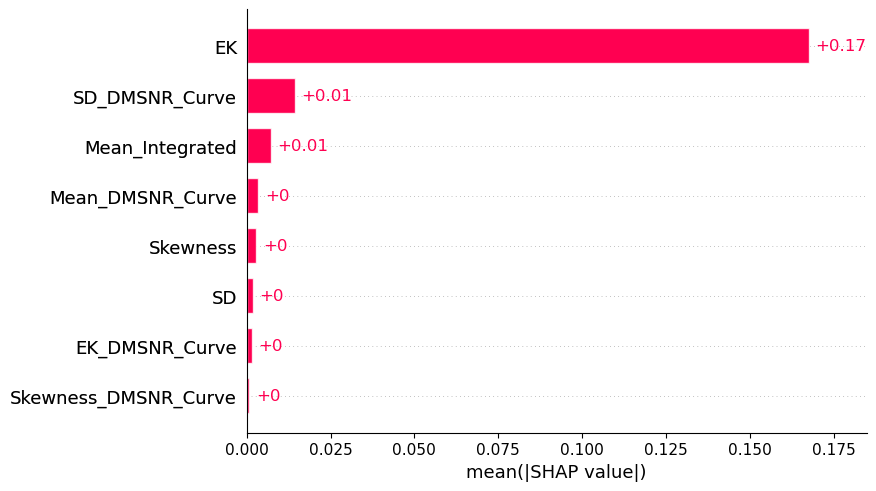

In [64]:
# Istotnośc cech dla zwycięskiego modelu
#-----------------------------------------------------------------------------------------------
shap.plots.bar(shap_values)

/home/przemek/miniconda3/envs/tf/lib/python3.8/site-packages/shap/plots/_beeswarm.py:375: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



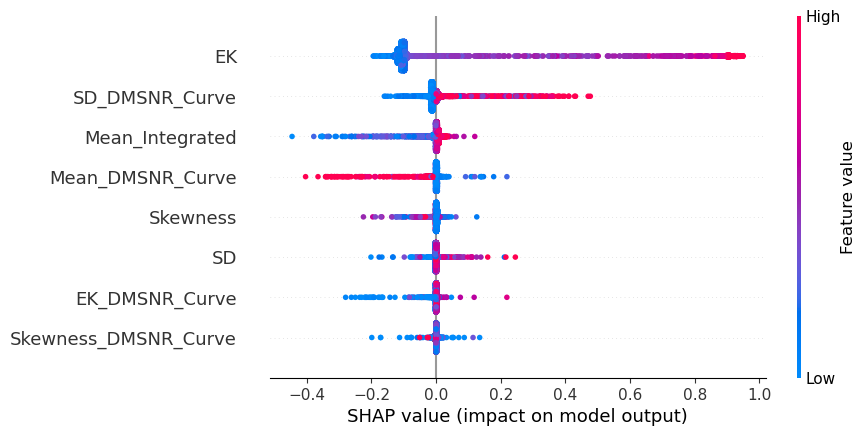

In [65]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.mean(0))

In [ ]:
print('KONIEC')